# Ensemble Methods in Machine Learning

## Introduction

Ensemble methods represent a fundamental class of techniques in machine learning designed to improve predictive performance by combining the outputs of multiple models. These methods capitalize on the collective intelligence of various models to enhance accuracy and robustness, making them particularly effective across a wide range of applications.

### Types of Ensemble Methods

Ensemble methods are generally categorized into two main types: Bagging and Boosting, each with distinct methodologies and use cases:

- **Bagging (Bootstrap Aggregating)**: This technique reduces variance and helps avoid overfitting by training multiple independent models on different subsets of the data, selected with replacement. The final prediction is typically an average of these models' predictions for regression tasks or a majority vote for classification tasks.

- **Boosting**: Boosting methods focus on sequentially building models, with each new model focusing more on instances that previous models misclassified. This approach aims to create a strong predictive model from a series of weak models, enhancing the ensemble's ability to handle complex patterns in the data.

### Advantages of Ensemble Methods

- **Accuracy**: By combining multiple models, ensemble methods can achieve higher accuracy than individual models alone.
- **Robustness**: They are less likely to overfit, especially when models in the ensemble are diverse and independently trained.
- **Versatility**: Ensemble methods can be used for both classification and regression tasks and are adaptable to various data types and domains.

## Detailed Overview of Bagging and Random Forest

### Bagging

Bagging, or Bootstrap Aggregating, is a straightforward yet powerful ensemble technique that involves training multiple models (commonly decision trees) on bootstrapped subsets of the data.

#### Algorithm Workflow:
1. **Initialization**: Start with the original training dataset.
2. **Bootstrap Sampling**: Randomly draw subsets of the training dataset with replacement.
3. **Model Training**: Independently train each model on a different subset.
4. **Aggregation**: Combine the predictions through averaging (regression) or majority voting (classification).

#### Advantages:
- **Reduced Variance**: By averaging multiple estimates, bagging significantly lowers the variance without increasing bias.
- **Parallelization**: Each model can be trained in parallel, enhancing computational efficiency.
- **Flexibility**: Works with any form of machine learning algorithm.

#### Disadvantages:
- **Bias**: Bagging does not typically reduce bias, so if the base estimator is biased, the ensemble prediction will also be biased.
- **Complexity and Resource Intensity**: Requires substantial computational resources, especially as the number of models increases.

### Random Forest

Random Forest builds upon the concept of bagging but introduces additional randomness through feature selection. It is renowned for its performance and accuracy in various predictive tasks.

#### Algorithm Workflow:
1. **Bootstrap Sampling**: Similar to bagging, it involves sampling data points with replacement.
2. **Random Feature Selection**: At each node in the tree, select a random subset of features for splitting.
3. **Model Training**: Develop multiple decision trees on these varied samples.
4. **Aggregation**: The trees' predictions are aggregated to produce the final output.

#### Advantages:
- **Performance**: Generally provides high accuracy and handles overfitting well.
- **Feature Importance**: Offers insights into which features are most influential in predicting the target variable.
- **Adaptability**: Effective across a wide range of datasets and tasks.

#### Disadvantages:
- **Interpretability**: More complex than individual decision trees; the ensemble nature makes it harder to interpret.
- **Computational Demands**: The training process can be resource-intensive, especially with large datasets and many trees.
- **Inference Speed**: The need to aggregate predictions from many trees can lead to slower inference times compared to simpler models.

## Dataset

We utilize the California housing dataset, which includes metrics like median income, housing age, average rooms, average bedrooms, population, average occupancy, latitude, and longitude to predict median house value for California districts.

## Implementation

We will apply both Bagging and Random Forest methods and evaluate their performance in predicting housing prices.

### Bagging Regressor
The Bagging regressor uses base estimators to evaluate subsets of the dataset and aggregates their predictions.

### Random Forest Regressor
The Random Forest regressor builds a multitude of decision trees and merges their results to provide a more accurate and stable prediction.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

# Fetch the data
california_housing = fetch_california_housing()
X = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
y = california_housing.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [8]:
bagging_reg = BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                               n_estimators=100, random_state=42)
bagging_reg.fit(X_train, y_train)
y_pred_bagging = bagging_reg.predict(X_test)
mse_bagging = mean_squared_error(y_test, y_pred_bagging)
r2_bagging = r2_score(y_test, y_pred_bagging)
print(f"Bagging Regressor MSE: {mse_bagging}")
print(f"Bagging Regressor R2 Score: {r2_bagging}")


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Regressor MSE: 0.2568358813508342
Bagging Regressor R2 Score: 0.8043214985798688


In [9]:
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_reg.fit(X_train, y_train)
y_pred_rf = random_forest_reg.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest Regressor MSE: {mse_rf}")
print(f"Random Forest Regressor R2 Score: {r2_rf}")

Random Forest Regressor MSE: 0.25650512920799395
Random Forest Regressor R2 Score: 0.8045734925119942


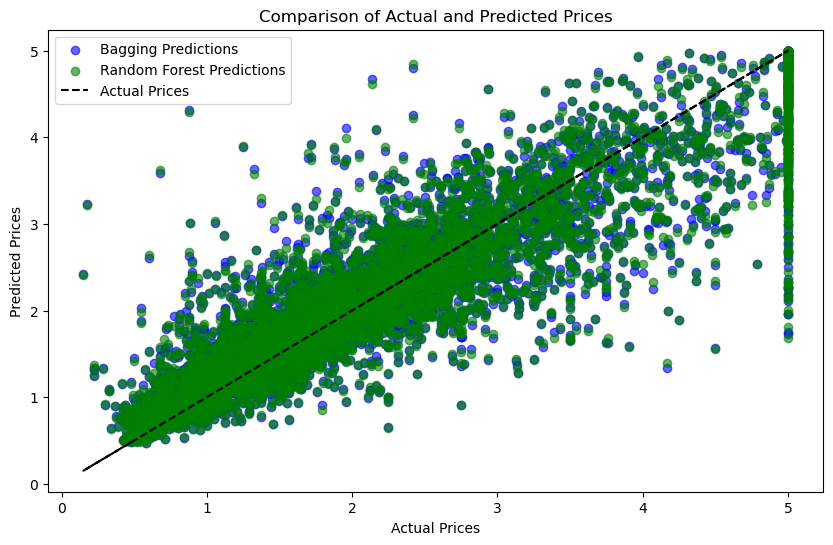

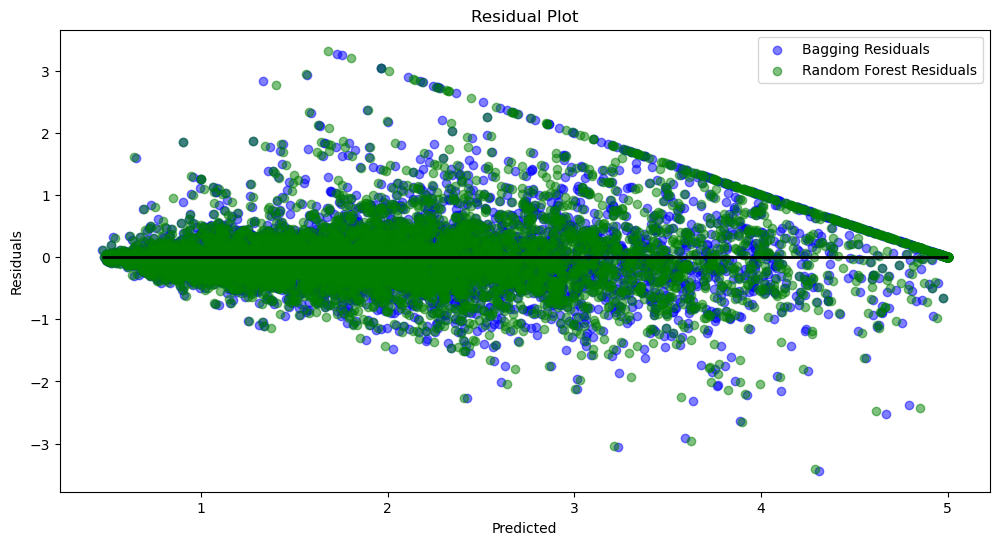

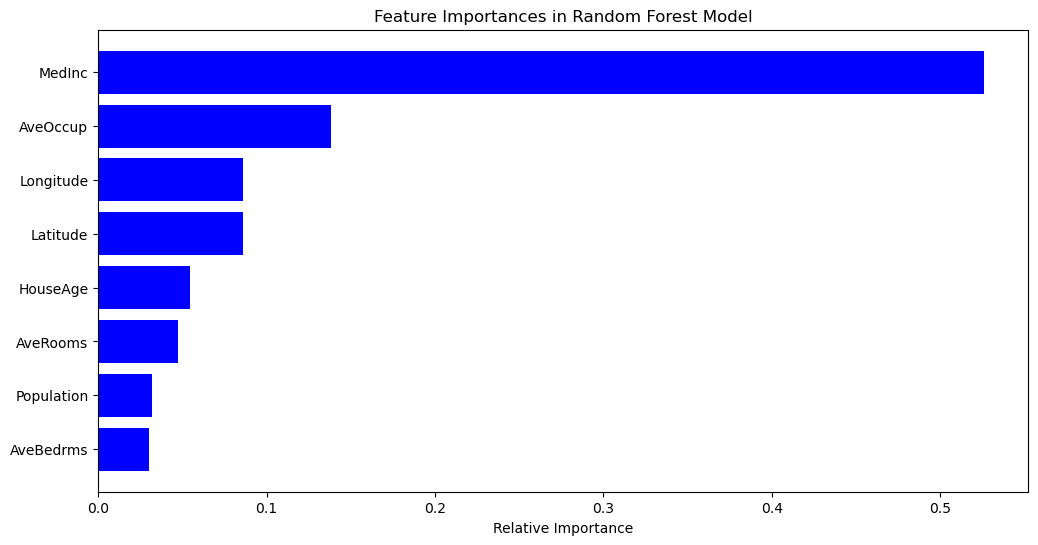

In [10]:
# Performance Visualization: Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_bagging, color='blue', alpha=0.6, label='Bagging Predictions')
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.6, label='Random Forest Predictions')
plt.plot(y_test, y_test, 'k--', label='Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Comparison of Actual and Predicted Prices')
plt.legend()
plt.show()

# Error Analysis: Residual Plot
residual_bagging = y_test - y_pred_bagging
residual_rf = y_test - y_pred_rf

# Plot for the Bagging residuals
plt.figure(figsize=(12, 6))
plt.scatter(y_pred_bagging, residual_bagging, alpha=0.5, label='Bagging Residuals', color='blue')
plt.scatter(y_pred_rf, residual_rf, alpha=0.5, label='Random Forest Residuals', color='green')
plt.hlines(y=0, xmin=min(y_pred_bagging.min(), y_pred_rf.min()), xmax=max(y_pred_bagging.max(), y_pred_rf.max()), color='black', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()

# Feature Importance for Random Forest
feature_importances = random_forest_reg.feature_importances_
features = X_train.columns
indices = np.argsort(feature_importances)[::-1]

# Plot for Feature importances
plt.figure(figsize=(12, 6))
plt.title('Feature Importances in Random Forest Model')
plt.barh(range(len(indices)), feature_importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.gca().invert_yaxis()  # To display the most important at the top
plt.show()


## Interpretation of Results

### Overview

In this analysis, we applied two advanced ensemble methods, Bagging and Random Forest, to predict housing prices using the California housing dataset. These methods were chosen for their ability to improve prediction accuracy by reducing variance and avoiding overfitting.

### Actual vs. Predicted Prices Plot

- **Visual Analysis**: The scatter plot comparing actual to predicted prices for both models shows most predictions clustering around the diagonal line, which represents perfect accuracy. This close alignment indicates that both models perform well, with predictions generally consistent with actual values.
- **Model Comparison**: The Random Forest model (green points) appears to conform slightly closer to the diagonal than the Bagging model (blue points), suggesting it may provide a marginally more accurate prediction on this dataset. This could be due to Random Forest's method of introducing additional randomness in feature selection, which can help reduce overfitting more effectively than standard Bagging.

### Residual Plot Analysis

- **Residual Behavior**: The residuals, or differences between observed and predicted values, provide insight into prediction errors. Ideally, residuals should be randomly distributed around the horizontal line at zero, with no clear pattern. The plots for both models show a wide spread as the predicted value increases, indicating larger errors with higher-priced homes.
- **Potential Issues**: The widening of residuals at higher predicted values suggests heteroscedasticity, where errors increase with the magnitude of the predicted variable. This is a common issue in housing price predictions due to the diverse range of home values and associated characteristics not fully captured by the model.

### Feature Importances in Random Forest Model

- **Key Predictors**: The bar chart of feature importances from the Random Forest model highlights 'MedInc' (Median Income) as the most influential feature, underscoring the strong relationship between income levels and housing prices. Longitude and latitude also play significant roles, reflecting geographical factors that impact real estate values.
- **Insights**: Understanding feature importance helps in recognizing which variables most affect housing prices and can guide further data collection and feature engineering to improve model accuracy.

### Quantitative Performance Metrics

- **Metrics Evaluated**:
  - **MSE (Mean Squared Error)**: Indicates the average squared difference between the estimated values and what is estimated. Lower values are better. Both models have similar MSEs, around 0.256, showing good model performance.
  - **R² (R-squared)**: Describes the proportion of variance in the dependent variable that is predictable from the independent variables. Values closer to 1.0 are preferable. Scores around 0.804 suggest that about 80.4% of the variability in housing prices is explained by the models, which is a strong fit for real-world data.

## Conclusion

The application of Bagging and Random Forest to the California housing dataset has demonstrated substantial predictive accuracy, with both models explaining over 80% of the variance in housing prices. While both models provide robust predictions, the Random Forest edges out slightly in performance, likely due to its enhanced handling of feature selection variability and its ability to manage overfitting more effectively than Bagging alone.

### Future Recommendations

- **Model Optimization**: Further tuning of model parameters, exploration of additional features, and incorporation of other ensemble techniques such as Boosting or Stacking could potentially enhance prediction accuracy.
- **Broader Application**: Testing these models on different datasets or across different regions could validate their effectiveness and robustness in varying market conditions.

This analysis underscores the power of ensemble methods in tackling complex regression tasks like housing price prediction, providing valuable tools for data scientists working in real estate analytics.